In [98]:
import random
import time
import cellbell

import pickle
import gc

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.sparse import csr_matrix
from scipy.sparse.linalg import inv
from scipy.linalg import sqrtm
from scipy.sparse import eye
from scipy import linalg
import scipy
from scipy import stats

from cvxpy import *

#import Pre_processing

| $C_r$\ $C$ | 0.1 | 0.5 | 1 | 5 | 10 | 15 |
|:----------:|:---:|:---:|:-:|:-:|:--:|:--:|
|    10      |**AC** = *0.*, **Sp** = *0.*, **Pear** = *0.*|**AC** = *0.*, **Sp** = *0.*, **Pear** = *0.*|**AC** = *0.*, **Sp** = *0.*, **Pear** = *0.*|**AC** = *0.*, **Sp** = *0.*, **Pear** = *0.*|**AC** = *0.*, **Sp** = *0.*, **Pear** = *0.*|**AC** = *0.*, **Sp** = *0.*, **Pear** = *0.*|
|    1       |**AC** = *0.*, **Sp** = *0.*, **Pear** = *0.*|**AC** = *0.*, **Sp** = *0.*, **Pear** = *0.*|**AC** = *0.*, **Sp** = *0.*, **Pear** = *0.*|**AC** = *0.*, **Sp** = *0.*, **Pear** = *0.*|**AC** = *0.*, **Sp** = *0.*, **Pear** = *0.*|**AC** = *0.*, **Sp** = *0.*, **Pear** = *0.*|
|    0.1     |**AC** = *0.*, **Sp** = *0.*, **Pear** = *0.*|**AC** = *0.*, **Sp** = *0.*, **Pear** = *0.*|**AC** = *0.*, **Sp** = *0.*, **Pear** = *0.*|**AC** = *0.*, **Sp** = *0.*, **Pear** = *0.*|**AC** = *0.*, **Sp** = *0.*, **Pear** = *0.*|**AC** = *0.*, **Sp** = *0.*, **Pear** = *0.*|
|    0.05    |**AC** = *0.*, **Sp** = *0.*, **Pear** = *0.*|**AC** = *0.*, **Sp** = *0.*, **Pear** = *0.*|**AC** = *0.*, **Sp** = *0.*, **Pear** = *0.*|**AC** = *0.*, **Sp** = *0.*, **Pear** = *0.*|**AC** = *0.*, **Sp** = *0.*, **Pear** = *0.*|**AC** = *0.*, **Sp** = *0.*, **Pear** = *0.*|
|    0.01    |**AC** = *0.*, **Sp** = *0.*, **Pear** = *0.*|**AC** = *0.*, **Sp** = *0.*, **Pear** = *0.*|**AC** = *0.*, **Sp** = *0.*, **Pear** = *0.*|**AC** = *0.*, **Sp** = *0.*, **Pear** = *0.*|**AC** = *0.*, **Sp** = *0.*, **Pear** = *0.*|**AC** = *0.*, **Sp** = *0.*, **Pear** = *0.*|
|    0.005   |**AC** = *0.*, **Sp** = *0.*, **Pear** = *0.*|**AC** = *0.*, **Sp** = *0.*, **Pear** = *0.*|**AC** = *0.*, **Sp** = *0.*, **Pear** = *0.*|**AC** = *0.*, **Sp** = *0.*, **Pear** = *0.*|**AC** = *0.*, **Sp** = *0.*, **Pear** = *0.*|**AC** = *0.*, **Sp** = *0.*, **Pear** = *0.*|
|    0.001   |**AC** = *0.*, **Sp** = *0.*, **Pear** = *0.*|**AC** = *0.*, **Sp** = *0.*, **Pear** = *0.*|**AC** = *0.*, **Sp** = *0.*, **Pear** = *0.*|**AC** = *0.*, **Sp** = *0.*, **Pear** = *0.*|**AC** = *0.*, **Sp** = *0.*, **Pear** = *0.*|**AC** = *0.*, **Sp** = *0.*, **Pear** = *0.*|
|    0.0005  |**AC** = *0.*, **Sp** = *0.*, **Pear** = *0.*|**AC** = *0.*, **Sp** = *0.*, **Pear** = *0.*|**AC** = *0.*, **Sp** = *0.*, **Pear** = *0.*|**AC** = *0.*, **Sp** = *0.*, **Pear** = *0.*|**AC** = *0.*, **Sp** = *0.*, **Pear** = *0.*|**AC** = *0.*, **Sp** = *0.*, **Pear** = *0.*|
|    0.0001  |**AC** = *0.*, **Sp** = *0.*, **Pear** = *0.*|**AC** = *0.*, **Sp** = *0.*, **Pear** = *0.*|**AC** = *0.*, **Sp** = *0.*, **Pear** = *0.*|**AC** = *0.*, **Sp** = *0.*, **Pear** = *0.*|**AC** = *0.*, **Sp** = *0.*, **Pear** = *0.*|**AC** = *0.*, **Sp** = *0.*, **Pear** = *0.*|

In [12]:
def inv_A_count_and_record( C_r, X, file_name_for_record = False ):
    """
    Возвращает посчитанную инвертированную матрицу А. 
    В качестве Х нужно матрицу нативных признаков.
    Вернет симметричную квадратную матрицу размера n*n, где n - количество признаков
    """
    X_T_X = (X.T @ X).A
    size = (X_T_X).shape[0]
    
    values, vectors = np.linalg.eigh( ( np.identity( size ) + (2*C_r)*X_T_X ) )
    sqrt_A = vectors @ np.diag(np.sqrt(values)) @ np.linalg.inv(vectors)
    
    #---------------Другой способ-------------------------------
    
    #inv_A_1 = sqrtm( ( scipy.sparse.eye( size ) + 2*C_r*X_T_X ).A)
    
    #------------------------------------------------------------
    
    sqrt_A = 0.5*(sqrt_A + sqrt_A.T)
    
    inv_A = np.linalg.inv(sqrt_A)
    
    del sqrt_A
    
    inv_A = 0.5*(inv_A + inv_A.T)
    
    del X_T_X
    
    
    if file_name_for_record == False:
        return inv_A
    else:
        np.save( inv_A_csr, file_name_for_record )

In [13]:
def d_count_and_record( C_r, X, inv_A, s, file_name_for_record = False ):
    """
    В качестве X следует подать матрицу с комплексами в нативной конформации
    Вернет вектор, длиной n, где n - количество признаков
    """
    X_T_s = X.T.A @ s
    b = (2 * C_r) * (inv_A @ X_T_s)
    
    del X_T_s
    
    if file_name_for_record == False:
        return d
    else: 
        np.save(file_name_for_record, d)

In [14]:
def new_X_count_and_record( inv_A, X, file_name_for_record =False ):
    """
    В качестве X следует подать полную матрицу положений, а в качестве inv_A обращенную матрицу A посчитанную на нативных положениях
    Произведет замену и вернет новую матрицу признаков
    """
    #conv_X = inv_A * X.T
    conv_X = X.A @ inv_A
    if file_name_for_record == False:
        return conv_X
    else:
        CSR_write(conv_X, file_name_for_record)

In [15]:
def creat_and_record_vector_ydx( X, y, d, file_name_for_record = False ):
    
    vector = []
    for ind, value in enumerate(y):
        if value == -1:
            vector.append( -X[ind] @ d -1.0 )
        else:
            vector.append( X[ind] @ d - 1.0 )
    
    if file_name_for_record == False:
        return np.array(vector)
    else:
        np.save(file_name_for_record, vector)

In [16]:
def index_with_native_conformation(y, file_name_for_record = False):
    """
    Нужна для того, чтобы не нужно было считать скалярные произведения там, где значене будет 0 из-за y_i
    """
    not_null_index = []
    for index, value in enumerate(y):
        if value == 1:
            not_null_index.append(index)
            
    if file_name_for_record == False:    
        return not_null_index
    else:
        np.save(file_name_for_record, not_null_index)

In [2]:
def w_count_and_record(lambda_v, y, X, inv_A, d):
            
    ly = lambda_v * y
    Xly = X.A.T @ ly
    w_transformed = inv_A @ Xly
    
    del Xly
    del ly
    
    w_t_d = w_transformed + d
    w = inv_A @ w_t_d
    
    del w_t_d
    
    return w

In [3]:
def corr_energy(y, X, w, s, method = "Spearman"):
    
    inc = index_with_native_conformation(y)
    X_native = X[inc]
    s_count = X_native @ w
    
    if method == "Spearman":
        return stats.spearmanr(s_count, s)
    elif method == "Pearson":
        return stats.pearsonr(s_count, s)
    else:
        print("It's metod do not exist!")

In [181]:
def prop_native_conformations(y, X, w, num_conformation = 19, num_complexs = None ):
    if num_complexs == None:
        num_complexs = int(len(y)/num_conformation)
    positive_count = 0
    s_count = X @ w
    for i in range(0,num_conformation*(num_complexs), num_conformation):
        ind = np.argmax(s_count[i:i+num_conformation])
        if y[i+ind] == 1.0:
            positive_count += 1
    return positive_count/num_complexs

---

In [17]:
y_1000_float64 = np.load("Data/1000_64float_good/labels_general_t14_t3_l7.0_g1.0_r1.0sasa_solvent_all_float64_first1000.npy").astype(dtype=np.float)
s_1000_float64 = np.load("Data/1000_64float_good/affinities_general_t14_t3_l7.0_g1.0_r1.0sasa_solvent_all_float64_first1000.npy")

loader = np.load("Data/1000_64float_good/data_array_general_t14_t3_l7.0_g1.0_r1.0sasa_solvent_all_float64_first1000_sparse.npz")
X_1000_float64 = csr_matrix((loader['data'], loader['indices'], loader['indptr']),
               shape=loader['shape']) 
del loader

---

### Сетка 1: Сетка с всеми признаками от классификации и с flexibility
Признаки никак не обрабатывались. Ошибка в вычислении d не исправлена.

$C_r$ in [10, 1, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]

$C$ in [0.1, 0.5, 1, 5, 10, 15]

In [18]:
ind = [i for i in range(6440)]
ind.append(6818)

X_1000_float64_1 = X_1000_float64[:,ind]

X_1000_float64_1.shape

(19000, 6441)

In [19]:
P = 1000
D = 19

set_i_and_j = range(1, P*D+1)
set_k = range(1, D+1)
set_l = range(0,P*D,D)

In [23]:
C_r = [10, 1, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]
C = [0.1, 0.5, 1, 5, 10, 15]

In [11]:
lambda_

19000

In [25]:
for c in C:
    for c_r in C_r:
        #----------------------------------------------------------------------------
        
        index_native_conf = index_with_native_conformation(y_1000_float64)
        
        X_1000_float64_native = X_1000_float64_1[index_native_conf]
        
        inv_A = inv_A_count_and_record( c_r, X_1000_float64_native )
        
        d = d_count_and_record( c_r, X_1000_float64_native, inv_A, s_1000_float64 )
        
        X_1000_float64_new = new_X_count_and_record( inv_A, X_1000_float64_1 )
        
        ydx = creat_and_record_vector_ybx( X_1000_float64_new, y_1000_float64, d )
        
        #-----------------------------------------------------------------------------

        lambda_v = np.load("output_grids/Grid_1/Grid_1_C_"+str(c)+"_Cr_"+str(c_r)+".npy")
        
        #-----------------------------------------------------------------------------
        
        #Забыл, что надо записывать w, поэтому на первой итерации у меня записаны lambda
        w = w_count_and_record(lambda_v, y_1000_float64, X_1000_float64_1, inv_A, d)
        
        Spearman = corr_energy(y_1000_float64, X_1000_float64_1, w, s_1000_float64, method = "Spearman")
        Pearson = corr_energy(y_1000_float64, X_1000_float64_1, w, s_1000_float64, method = "Pearson")
        accr = prop_native_conformations(y_1000_float64, X_1000_float64_1, w)
        
        #-----------------------------------------------------------------------------
        
        print("C = {0}, C_r = {1} : accr = {2}, Spearman = {3}, Pearson = {4}\n".format(c,c_r,accr,Spearman[0],Pearson[0]))

C = 0.1, C_r = 10 : accr = 0.002, Spearman = 0.5767813914744477, Pearson = 0.5696181480711415

C = 0.1, C_r = 1 : accr = 0.002, Spearman = 0.4948433302255191, Pearson = 0.4692869307752925

C = 0.1, C_r = 0.1 : accr = 0.004, Spearman = 0.42303557381254525, Pearson = 0.39887194180486585

C = 0.1, C_r = 0.05 : accr = 0.003, Spearman = 0.38955863180523037, Pearson = 0.3598575024956969

C = 0.1, C_r = 0.01 : accr = 0.003, Spearman = 0.31590904378612084, Pearson = 0.1805612133091095

C = 0.1, C_r = 0.005 : accr = 0.005, Spearman = 0.28696956115254635, Pearson = 0.10586198281671326

C = 0.1, C_r = 0.001 : accr = 0.33, Spearman = 0.23253111877348165, Pearson = 0.04419461341944702

C = 0.1, C_r = 0.0005 : accr = 0.717, Spearman = 0.2320159478489439, Pearson = 0.04283488084746412

C = 0.1, C_r = 0.0001 : accr = 0.829, Spearman = 0.23268293822472932, Pearson = 0.04258691471824071

C = 0.5, C_r = 10 : accr = 0.002, Spearman = 0.5765575833350575, Pearson = 0.5692488608161765

C = 0.5, C_r = 1 : acc

| $C_r$\ $C$ | 0.1 | 0.5 | 1 | 5 | 10 | 15 |
|:----------:|:---:|:---:|:-:|:-:|:--:|:--:|
|    10      |**AC** = *0.002*, **Sp** = *0.577*, **Pear** = *0.570*|**AC** = *0.002*, **Sp** = *0.577*, **Pear** = *0.569*|**AC** = *0.003*, **Sp** = *0.577*, **Pear** = *0.569*|**AC** = *0.034*, **Sp** = *0.573*, **Pear** = *0.564*|**AC** = *0.097*, **Sp** = *0.569*, **Pear** = *0.558*|**AC** = *0.144*, **Sp** = *0.567*, **Pear** = *0.554*|
|    1       |**AC** = *0.002*, **Sp** = *0.495*, **Pear** = *0.469*|**AC** = *0.005*, **Sp** = *0.493*, **Pear** = *0.468*|**AC** = *0.014*, **Sp** = *0.491*, **Pear** = *0.467*|**AC** = *0.072*, **Sp** = *0.472*, **Pear** = *0.451*|**AC** = *0.170*, **Sp** = *0.457*, **Pear** = *0.436*|**AC** = *0.275*, **Sp** = *0.446*, **Pear** = *0.422*|
|    0.1     |**AC** = *0.004*, **Sp** = *0.423*, **Pear** = *0.399*|**AC** = *0.011*, **Sp** = *0.403*, **Pear** = *0.377*|**AC** = *0.020*, **Sp** = *0.381*, **Pear** = *0.349*|**AC** = *0.236*, **Sp** = *0.338*, **Pear** = *0.208*|**AC** = *0.533*, **Sp** = *0.316*, **Pear** = *0.137*|**AC** = *0.700*, **Sp** = *0.303*, **Pear** = *0.114*|
|    0.05    |**AC** = *0.003*, **Sp** = *0.389*, **Pear** = *0.360*|**AC** = *0.01*, **Sp** = *0.359*, **Pear** = *0.310*|**AC** = *0.028*, **Sp** = *0.422*, **Pear** = *0.259*|**AC** = *0.451*, **Sp** = *0.292*, **Pear** = *0.101*|**AC** = *0.747*, **Sp** = *0.271*, **Pear** = *0.077*|**AC** = *0.799*, **Sp** = *0.271*, **Pear** = *0.077*|
|    0.01    |**AC** = *0.003*, **Sp** = *0.316*, **Pear** = *0.181*|**AC** = *0.08*, **Sp** = *0.279*, **Pear** = *0.089*|**AC** = *0.362*, **Sp** = *0.251*, **Pear** = *0.058*|**AC** = *0.824*, **Sp** = *0.241*, **Pear** = *0.051*|**AC** = *0.835*, **Sp** = *0.246*, **Pear** = *0.056*|**AC** = *0.840*, **Sp** = *0.252*, **Pear** = *0.060*|
|    0.005   |**AC** = *0.005*, **Sp** = *0.287*, **Pear** = *0.106*|**AC** = *0.346*, **Sp** = *0.241*, **Pear** = *0.051*|**AC** = *0.721*, **Sp** = *0.235*, **Pear** = *0.046*|**AC** = *0.834*, **Sp** = *0.238*, **Pear** = *0.490*|**AC** = *0.842*, **Sp** = *0.244*, **Pear** = *0.054*|**AC** = *0.844*, **Sp** = *0.250*, **Pear** = *0.589*|
|    0.001   |**AC** = *0.33*, **Sp** = *0.233*, **Pear** = *0.044*|**AC** = *0.819*, **Sp** = *0.233*, **Pear** = *0.043*|**AC** = *0.835*, **Sp** = *0.233*, **Pear** = *0.044*|**AC** = *0.847*, **Sp** = *0.237*, **Pear** = *0.048*|**AC** = *0.850*, **Sp** = *0.243*, **Pear** = *0.054*|**AC** = *0.849*, **Sp** = *0.249*, **Pear** = *0.058*|
|    0.0005  |**AC** = *0.717*, **Sp** = *0.232*, **Pear** = *0.043*|**AC** = *0.832*, **Sp** = *0.233*, **Pear** = *0.043*|**AC** = *0.842*, **Sp** = *0.233*, **Pear** = *0.044*|**AC** = *0.848*, **Sp** = *0.237*, **Pear** = *0.047*|**AC** = *0.850*, **Sp** = *0.242*, **Pear** = *0.052*|**AC** = *0.850*, **Sp** = *0.248*, **Pear** = *0.058*|
|    0.0001  |**AC** = *0.829*, **Sp** = *0.233*, **Pear** = *0.043*|**AC** = *0.844*, **Sp** = *0.233*, **Pear** = *0.043*|**AC** = *0.849*, **Sp** = *0.233*, **Pear** = *0.044*|**AC** = *0.850*, **Sp** = *0.237*, **Pear** = *0.047*|**AC** = *0.851*, **Sp** = *0.242*, **Pear** = *0.052*|**AC** = *0.851*, **Sp** = *0.248*, **Pear** = *0.058*|

### Сетка 1: Сетка с всеми признаками от классификации и с flexibility
Признаки никак не обрабатывались. Ошибка в вычислении d исправлена

$C_r$ in [10, 1, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]

$C$ in [15]

In [58]:
ind = [i for i in range(6440)]
ind.append(6818)

X_1000_float64_1 = X_1000_float64[:,ind]

X_1000_float64_1.shape

(19000, 6441)

In [59]:
P = 1000
D = 19

set_i_and_j = range(1, P*D+1)
set_k = range(1, D+1)
set_l = range(0,P*D,D)

In [60]:
C_r = [10, 1, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0]
C = [0.1, 0.5, 1, 5, 10, 15]

In [62]:
array_with_data = []
for c in C:
    for c_r in C_r:
        w = np.load("output_grids/Grid_2/Grid_2_C_"+str(c)+"_Cr_"+str(c_r)+".npy")
        
        #-----------------------------------------------------------------------------
        
        Spearman = corr_energy(y_1000_float64, X_1000_float64_1, w, s_1000_float64, method = "Spearman")
        Pearson = corr_energy(y_1000_float64, X_1000_float64_1, w, s_1000_float64, method = "Pearson")
        accr = prop_native_conformations(y_1000_float64, X_1000_float64_1, w)
        
        array_with_data.append([c,c_r,accr,Spearman,Pearson])
        print("C = {0}, C_r = {1} : **AC** = *{2}*, **Sp** = *{3}*, **Pear** = *{4}*\n".format(c,c_r,round(accr,3),round(Spearman[0],3),round(Pearson[0],3)))

C = 0.1, C_r = 10 : **AC** = *0.002*, **Sp** = *0.577*, **Pear** = *0.57*

C = 0.1, C_r = 1 : **AC** = *0.003*, **Sp** = *0.495*, **Pear** = *0.469*

C = 0.1, C_r = 0.1 : **AC** = *0.004*, **Sp** = *0.424*, **Pear** = *0.4*

C = 0.1, C_r = 0.05 : **AC** = *0.002*, **Sp** = *0.392*, **Pear** = *0.363*

C = 0.1, C_r = 0.01 : **AC** = *0.001*, **Sp** = *0.319*, **Pear** = *0.192*

C = 0.1, C_r = 0.005 : **AC** = *0.002*, **Sp** = *0.292*, **Pear** = *0.118*

C = 0.1, C_r = 0.001 : **AC** = *0.144*, **Sp** = *0.235*, **Pear** = *0.046*

C = 0.1, C_r = 0.0005 : **AC** = *0.565*, **Sp** = *0.232*, **Pear** = *0.043*

C = 0.1, C_r = 0.0001 : **AC** = *0.82*, **Sp** = *0.233*, **Pear** = *0.043*

C = 0.1, C_r = 0 : **AC** = *0.85*, **Sp** = *0.45*, **Pear** = *0.405*

C = 0.5, C_r = 10 : **AC** = *0.002*, **Sp** = *0.577*, **Pear** = *0.569*

C = 0.5, C_r = 1 : **AC** = *0.004*, **Sp** = *0.494*, **Pear** = *0.469*

C = 0.5, C_r = 0.1 : **AC** = *0.005*, **Sp** = *0.41*, **Pear** = *0.386*

C 

| $C_r$\ $C$ | 0.1 | 0.5 | 1 | 5 | 10 | 15 |
|:----------:|:---:|:---:|:-:|:-:|:--:|:--:|
|    10      |**AC** = *0.002*, **Sp** = *0.577*, **Pear** = *0.570*|**AC** = *0.002*, **Sp** = *0.577*, **Pear** = *0.569*|**AC** = *0.002*, **Sp** = *0.576*, **Pear** = *0.569*|**AC** = *0.017*, **Sp** = *0.574*, **Pear** = *0.566*|**AC** = *0.053*, **Sp** = *0.571*, **Pear** = *0.562*|**AC** = *0.102*, **Sp** = *0.569*, **Pear** = *0.558*|
|    1       |**AC** = *0.003*, **Sp** = *0.495*, **Pear** = *0.469*|**AC** = *0.004*, **Sp** = *0.494*, **Pear** = *0.469*|**AC** = *0.009*, **Sp** = *0.492*, **Pear** = *0.468*|**AC** = *0.048*, **Sp** = *0.479*, **Pear** = *0.457*|**AC** = *0.112*, **Sp** = *0.465*, **Pear** = *0.444*|**AC** = *0.179*, **Sp** = *0.456*, **Pear** = *0.434*|
|    0.1     |**AC** = *0.004*, **Sp** = *0.424*, **Pear** = *0.400*|**AC** = *0.005*, **Sp** = *0.410*, **Pear** = *0.386*|**AC** = *0.012*, **Sp** = *0.392*, **Pear** = *0.365*|**AC** = *0.136*, **Sp** = *0.345*, **Pear** = *0.247*|**AC** = *0.365*, **Sp** = *0.329*, **Pear** = *0.170*|**AC** = *0.551*, **Sp** = *0.314*, **Pear** = *0.133*|
|    0.05    |**AC** = *0.002*, **Sp** = *0.392*, **Pear** = *0.363*|**AC** = *0.006*, **Sp** = *0.370*, **Pear** = *0.329*|**AC** = *0.020*, **Sp** = *0.350*, **Pear** = *0.288*|**AC** = *0.293*, **Sp** = *0.309*, **Pear** = *0.129*|**AC** = *0.627*, **Sp** = *0.279*, **Pear** = *0.085*|**AC** = *0.753*, **Sp** = *0.271*, **Pear** = *0.077*|
|    0.01    |**AC** = *0.001*, **Sp** = *0.319*, **Pear** = *0.192*|**AC** = *0.042*, **Sp** = *0.292*, **Pear** = *0.111*|**AC** = *0.185*, **Sp** = *0.264*, **Pear** = *0.070*|**AC** = *0.805*, **Sp** = *0.239*, **Pear** = *0.050*|**AC** = *0.828*, **Sp** = *0.243*, **Pear** = *0.053*|**AC** = *0.835*, **Sp** = *0.247*, **Pear** = *0.056*|
|    0.005   |**AC** = *0.002*, **Sp** = *0.292*, **Pear** = *0.118*|**AC** = *0.165*, **Sp** = *0.251*, **Pear** = *0.058*|**AC** = *0.572*, **Sp** = *0.237*, **Pear** = *0.047*|**AC** = *0.828*, **Sp** = *0.237*, **Pear** = *0.048*|**AC** = *0.840*, **Sp** = *0.241*, **Pear** = *0.051*|**AC** = *0.843*, **Sp** = *0.245*, **Pear** = *0.054*|
|    0.001   |**AC** = *0.144*, **Sp** = *0.235*, **Pear** = *0.046*|**AC** = *0.800*, **Sp** = *0.232*, **Pear** = *0.043*|**AC** = *0.829*, **Sp** = *0.233*, **Pear** = *0.043*|**AC** = *0.848*, **Sp** = *0.235*, **Pear** = *0.046*|**AC** = *0.847*, **Sp** = *0.239*, **Pear** = *0.050*|**AC** = *0.850*, **Sp** = *0.243*, **Pear** = *0.053*|
|    0.0005  |**AC** = *0.565*, **Sp** = *0.232*, **Pear** = *0.043*|**AC** = *0.829*, **Sp** = *0.233*, **Pear** = *0.043*|**AC** = *0.839*, **Sp** = *0.233*, **Pear** = *0.043*|**AC** = *0.849*, **Sp** = *0.235*, **Pear** = *0.046*|**AC** = *0.849*, **Sp** = *0.239*, **Pear** = *0.050*|**AC** = *0.850*, **Sp** = *0.243*, **Pear** = *0.053*|
|    0.0001  |**AC** = *0.820*, **Sp** = *0.233*, **Pear** = *0.043*|**AC** = *0.844*, **Sp** = *0.233*, **Pear** = *0.043*|**AC** = *0.848*, **Sp** = *0.233*, **Pear** = *0.043*|**AC** = *0.850*, **Sp** = *0.235*, **Pear** = *0.046*|**AC** = *0.851*, **Sp** = *0.239*, **Pear** = *0.050*|**AC** = *0.851*, **Sp** = *0.243*, **Pear** = *0.053*|
|    0       |**AC** = *0.850*, **Sp** = *0.450*, **Pear** = *0.405*|**AC** = *0.850*, **Sp** = *0.449*, **Pear** = *0.403*|**AC** = *0.851*, **Sp** = *0.448*, **Pear** = *0.402*|**AC** = *0.851*, **Sp** = *0.451*, **Pear** = *0.407*|**AC** = *0.851*, **Sp** = *0.397*, **Pear** = *0.289*|**AC** = *0.851*, **Sp** = *0.452*, **Pear** = *0.388*|

### Значения, если взять за вектор **d** вектор, посчитанный для C = 15, $C_r$ = 0.00001
| $C_r$\ $C$ | 0.1 | 0.5 | 1 | 5 | 10 | 15 |
|:----------:|:---:|:---:|:-:|:-:|:--:|:--:|
|    10      |**AC** = *0.855*, **Sp** = *0.267*, **Pear** = *0.075*|**AC** = *0.874*, **Sp** = *0.282*, **Pear** = *0.096*|**AC** = *0.871*, **Sp** = *0.288*, **Pear** = *0.123*|**AC** = *0.868*, **Sp** = *0.255*, **Pear** = *0.229*|**AC** = *0.866*, **Sp** = *0.230*, **Pear** = *0.226*|**AC** = *0.865*, **Sp** = *0.219*, **Pear** = *0.217*|
|    1       |**AC** = *0.796*, **Sp** = *0.257*, **Pear** = *0.064*|**AC** = *0.859*, **Sp** = *0.280*, **Pear** = *0.087*|**AC** = *0.863*, **Sp** = *0.305*, **Pear** = *0.120*|**AC** = *0.866*, **Sp** = *0.412*, **Pear** = *0.360*|**AC** = *0.867*, **Sp** = *0.423*, **Pear** = *0.385*|**AC** = *0.867*, **Sp** = *0.416*, **Pear** = *0.362*|
|    0.1     |**AC** = *0.816*, **Sp** = *0.238*, **Pear** = *0.049*|**AC** = *0.849*, **Sp** = *0.251*, **Pear** = *0.060*|**AC** = *0.852*, **Sp** = *0.268*, **Pear** = *0.075*|**AC** = *0.852*, **Sp** = *0.357*, **Pear** = *0.220*|**AC** = *0.850*, **Sp** = *0.434*, **Pear** = *0.382*|**AC** = *0.850*, **Sp** = *0.473*, **Pear** = *0.436*|
|    0.05    |**AC** = *0.822*, **Sp** = *0.236*, **Pear** = *0.046*|**AC** = *0.848*, **Sp** = *0.245*, **Pear** = *0.055*|**AC** = *0.849*, **Sp** = *0.258*, **Pear** = *0.066*|**AC** = *0.851*, **Sp** = *0.334*, **Pear** = *0.167*|**AC** = *0.851*, **Sp** = *0.391*, **Pear** = *0.306*|**AC** = *0.851*, **Sp** = *0.448*, **Pear** = *0.403*|
|    0.01    |**AC** = *0.830*, **Sp** = *0.233*, **Pear** = *0.044*|**AC** = *0.847*, **Sp** = *0.237*, **Pear** = *0.048*|**AC** = *0.849*, **Sp** = *0.243*, **Pear** = *0.053*|**AC** = *0.850*, **Sp** = *0.287*, **Pear** = *0.095*|**AC** = *0.851*, **Sp** = *0.328*, **Pear** = *0.156*|**AC** = *0.851*, **Sp** = *0.357*, **Pear** = *0.221*|
|    0.005   |**AC** = *0.831*, **Sp** = *0.233*, **Pear** = *0.043*|**AC** = *0.845*, **Sp** = *0.235*, **Pear** = *0.046*|**AC** = *0.849*, **Sp** = *0.239*, **Pear** = *0.050*|**AC** = *0.850*, **Sp** = *0.272*, **Pear** = *0.079*|**AC** = *0.851*, **Sp** = *0.306*, **Pear** = *0.120*|**AC** = *0.851*, **Sp** = *0.333*, **Pear** = *0.164*|
|    0.001   |**AC** = *0.835*, **Sp** = *0.233*, **Pear** = *0.043*|**AC** = *0.845*, **Sp** = *0.233*, **Pear** = *0.044*|**AC** = *0.850*, **Sp** = *0.235*, **Pear** = *0.046*|**AC** = *0.850*, **Sp** = *0.249*, **Pear** = *0.058*|**AC** = *0.851*, **Sp** = *0.268*, **Pear** = *0.075*|**AC** = *0.851*, **Sp** = *0.285*, **Pear** = *0.093*|
|    0.0005  |**AC** = *0.831*, **Sp** = *0.233*, **Pear** = *0.043*|**AC** = *0.846*, **Sp** = *0.233*, **Pear** = *0.044*|**AC** = *0.849*, **Sp** = *0.234*, **Pear** = *0.045*|**AC** = *0.850*, **Sp** = *0.244*, **Pear** = *0.054*|**AC** = *0.851*, **Sp** = *0.257*, **Pear** = *0.065*|**AC** = *0.851*, **Sp** = *0.270*, **Pear** = *0.077*|
|    0.0001  |**AC** = *0.829*, **Sp** = *0.233*, **Pear** = *0.043*|**AC** = *0.844*, **Sp** = *0.233*, **Pear** = *0.043*|**AC** = *0.849*, **Sp** = *0.233*, **Pear** = *0.043*|**AC** = *0.850*, **Sp** = *0.237*, **Pear** = *0.047*|**AC** = *0.851*, **Sp** = *0.242*, **Pear** = *0.052*|**AC** = *0.851*, **Sp** = *0.248*, **Pear** = *0.058*|
|      0     |**AC** = *0.802*, **Sp** = *0.232*, **Pear** = *0.042*|**AC** = *0.842*, **Sp** = *0.233*, **Pear** = *0.043*|**AC** = *0.845*, **Sp** = *0.232*, **Pear** = *0.043*|**AC** = *0.851*, **Sp** = *0.233*, **Pear** = *0.043*|**AC** = *0.85*, **Sp** = *0.233*, **Pear** = *0.044*|**AC** = *0.851*, **Sp** = *0.233*, **Pear** = *0.044*|

### Сетка 3: Сетка с всеми признаками от классификации и с flexibility
Признаки никак не обрабатывались. Ошибка в вычислениях d исправлена

$C_r$ in [10]

$C$ in [15,25,50,100,150,200,250,300]

In [63]:
ind = [i for i in range(6440)]
ind.append(6818)

X_1000_float64_1 = X_1000_float64[:,ind]

X_1000_float64_1.shape

(19000, 6441)

In [64]:
P = 1000
D = 19

set_i_and_j = range(1, P*D+1)
set_k = range(1, D+1)
set_l = range(0,P*D,D)

In [65]:
C_r = [10]
C = [15,25,50,100,150,200,250,300]

In [66]:
array_with_data = []
for c in C:
    for c_r in C_r:
        w = np.load("output_grids/Grid_3/Grid_3_C_"+str(c)+"_Cr_"+str(c_r)+".npy")
        
        #-----------------------------------------------------------------------------
        
        Spearman = corr_energy(y_1000_float64, X_1000_float64_1, w, s_1000_float64, method = "Spearman")
        Pearson = corr_energy(y_1000_float64, X_1000_float64_1, w, s_1000_float64, method = "Pearson")
        accr = prop_native_conformations(y_1000_float64, X_1000_float64_1, w)
        
        array_with_data.append([c,c_r,accr,Spearman,Pearson])
        print("C = {0}, C_r = {1} : **AC** = *{2}*, **Sp** = *{3}*, **Pear** = *{4}*\n".format(c,c_r,round(accr,3),round(Spearman[0],3),round(Pearson[0],3)))

C = 15, C_r = 10 : **AC** = *0.102*, **Sp** = *0.569*, **Pear** = *0.558*

C = 25, C_r = 10 : **AC** = *0.183*, **Sp** = *0.565*, **Pear** = *0.552*

C = 50, C_r = 10 : **AC** = *0.394*, **Sp** = *0.559*, **Pear** = *0.543*

C = 100, C_r = 10 : **AC** = *0.63*, **Sp** = *0.553*, **Pear** = *0.534*

C = 150, C_r = 10 : **AC** = *0.737*, **Sp** = *0.549*, **Pear** = *0.529*

C = 200, C_r = 10 : **AC** = *0.797*, **Sp** = *0.548*, **Pear** = *0.526*

C = 250, C_r = 10 : **AC** = *0.818*, **Sp** = *0.547*, **Pear** = *0.524*

C = 300, C_r = 10 : **AC** = *0.832*, **Sp** = *0.546*, **Pear** = *0.522*



| $C_r\backslash C$ | 15 | 25 | 50 | 100 | 150 | 200 | 250 | 300 |
|:----------:|:--:|:--:|:--:|:---:|:---:|:---:|:---:|:---:|
|     10     |**AC** = *0.102*, **Sp** = *0.569*, **Pear** = *0.558*|**AC** = *0.183*, **Sp** = *0.565*, **Pear** = *0.552*|**AC** = *0.394*, **Sp** = *0.559*, **Pear** = *0.543*|**AC** = *0.63*, **Sp** = *0.553*, **Pear** = *0.534*|**AC** = *0.737*, **Sp** = *0.549*, **Pear** = *0.529*|**AC** = *0.797*, **Sp** = *0.548*, **Pear** = *0.526*|**AC** = *0.818*, **Sp** = *0.547*, **Pear** = *0.524*|**AC** = *0.832*, **Sp** = *0.546*, **Pear** = *0.522*|

---

### Сетка 4: Сетка с всеми признаками от классификации и с flexibility
Признаки никак не обрабатывались. Ошибка в вычислениях d исправлена

$C_r$ in [0,5,15,30]

$C$ in [15,50,100,200,300,400,500,1000]

In [67]:
ind = [i for i in range(6440)]
ind.append(6818)

X_1000_float64_1 = X_1000_float64[:,ind]

X_1000_float64_1.shape

(19000, 6441)

In [68]:
P = 1000
D = 19

set_i_and_j = range(1, P*D+1)
set_k = range(1, D+1)
set_l = range(0,P*D,D)

In [69]:
C_r = [0,5,15,30]
C = [15,50,100,200,300,400,500,1000]

In [71]:
array_with_data = []
for c_r in C_r:
    for c in C:
        w = np.load("output_grids/Grid_4/Grid_4_C_"+str(c)+"_Cr_"+str(c_r)+".npy")
        
        #-----------------------------------------------------------------------------
        
        Spearman = corr_energy(y_1000_float64, X_1000_float64_1, w, s_1000_float64, method = "Spearman")
        Pearson = corr_energy(y_1000_float64, X_1000_float64_1, w, s_1000_float64, method = "Pearson")
        accr = prop_native_conformations(y_1000_float64, X_1000_float64_1, w)
        
        array_with_data.append([c,c_r,accr,Spearman,Pearson])
        print("C = {0}, C_r = {1} : **AC** = *{2}*, **Sp** = *{3}*, **Pear** = *{4}*\n".format(c,c_r,round(accr,3),round(Spearman[0],3),round(Pearson[0],3)))

C = 15, C_r = 0 : **AC** = *0.851*, **Sp** = *0.478*, **Pear** = *0.442*

C = 50, C_r = 0 : **AC** = *0.851*, **Sp** = *0.468*, **Pear** = *0.429*

C = 100, C_r = 0 : **AC** = *0.851*, **Sp** = *0.471*, **Pear** = *0.433*

C = 200, C_r = 0 : **AC** = *0.851*, **Sp** = *0.454*, **Pear** = *0.41*

C = 300, C_r = 0 : **AC** = *0.853*, **Sp** = *0.454*, **Pear** = *0.41*

C = 400, C_r = 0 : **AC** = *0.855*, **Sp** = *0.448*, **Pear** = *0.406*

C = 500, C_r = 0 : **AC** = *0.862*, **Sp** = *0.449*, **Pear** = *0.409*

C = 1000, C_r = 0 : **AC** = *0.879*, **Sp** = *0.448*, **Pear** = *0.407*

C = 15, C_r = 5 : **AC** = *0.115*, **Sp** = *0.539*, **Pear** = *0.522*

C = 50, C_r = 5 : **AC** = *0.445*, **Sp** = *0.526*, **Pear** = *0.506*

C = 100, C_r = 5 : **AC** = *0.657*, **Sp** = *0.52*, **Pear** = *0.496*

C = 200, C_r = 5 : **AC** = *0.797*, **Sp** = *0.516*, **Pear** = *0.49*

C = 300, C_r = 5 : **AC** = *0.836*, **Sp** = *0.518*, **Pear** = *0.49*

C = 400, C_r = 5 : **AC** = *0.85

| $C$\ $C_r$ |  0  |  5  |  15  |  30  |
|:----------:|:---:|:---:|:----:|:----:|
|    15      |**AC** = *0.851*, **Sp** = *0.478*, **Pear** = *0.442*|**AC** = *0.115*, **Sp** = *0.539*, **Pear** = *0.522*|**AC** = *0.080*, **Sp** = *0.587*, **Pear** = *0.580*|**AC** = *0.056*, **Sp** = *0.621*, **Pear** = *0.621*|
|    50      |**AC** = *0.851*, **Sp** = *0.468*, **Pear** = *0.429*|**AC** = *0.445*, **Sp** = *0.526*, **Pear** = *0.506*|**AC** = *0.366*, **Sp** = *0.576*, **Pear** = *0.565*|**AC** = *0.295*, **Sp** = *0.611*, **Pear** = *0.608*|
|    100     |**AC** = *0.851*, **Sp** = *0.471*, **Pear** = *0.433*|**AC** = *0.657*, **Sp** = *0.520*, **Pear** = *0.496*|**AC** = *0.600*, **Sp** = *0.569*, **Pear** = *0.555*|**AC** = *0.548*, **Sp** = *0.602*, **Pear** = *0.595*|
|    200     |**AC** = *0.851*, **Sp** = *0.454*, **Pear** = *0.410*|**AC** = *0.797*, **Sp** = *0.516*, **Pear** = *0.490*|**AC** = *0.779*, **Sp** = *0.565*, **Pear** = *0.547*|**AC** = *0.753*, **Sp** = *0.594*, **Pear** = *0.584*|
|    300     |**AC** = *0.853*, **Sp** = *0.454*, **Pear** = *0.410*|**AC** = *0.836*, **Sp** = *0.518*, **Pear** = *0.490*|**AC** = *0.835*, **Sp** = *0.560*, **Pear** = *0.541*|**AC** = *0.819*, **Sp** = *0.590*, **Pear** = *0.578*|
|    400     |**AC** = *0.855*, **Sp** = *0.448*, **Pear** = *0.406*|**AC** = *0.852*, **Sp** = *0.519*, **Pear** = *0.491*|**AC** = *0.852*, **Sp** = *0.557*, **Pear** = *0.536*|**AC** = *0.850*, **Sp** = *0.584*, **Pear** = *0.571*|
|    500     |**AC** = *0.862*, **Sp** = *0.449*, **Pear** = *0.409*|**AC** = *0.859*, **Sp** = *0.518*, **Pear** = *0.489*|**AC** = *0.872*, **Sp** = *0.555*, **Pear** = *0.532*|**AC** = *0.865*, **Sp** = *0.581*, **Pear** = *0.566*|
|    1000    |**AC** = *0.879*, **Sp** = *0.448*, **Pear** = *0.407*|**AC** = *0.885*, **Sp** = *0.508*, **Pear** = *0.475*|**AC** = *0.891*, **Sp** = *0.540*, **Pear** = *0.515*|**AC** = *0.890*, **Sp** = *0.566*, **Pear** = *0.548*|

---

### Сетка 5: Сетка с всеми признаками от классификации и с flexibility
Признаки никак не обрабатывались. Ошибка в вычислениях d исправлена

$C_r$ in [50,100,150,250,500,700,1000]

$C$ in [10000]

In [73]:
ind = [i for i in range(6440)]
ind.append(6818)

X_1000_float64_1 = X_1000_float64[:,ind]

X_1000_float64_1.shape

(19000, 6441)

In [74]:
P = 1000
D = 19

set_i_and_j = range(1, P*D+1)
set_k = range(1, D+1)
set_l = range(0,P*D,D)

In [114]:
C_r = [50,100,150,250,500,700,1000,1200,1500,1700,2000,2500,3000,4000,5000,6000,7000,8000]
C = [10000]

In [134]:
ACCR = []
SPEAR = []
PEAR = []
array_with_data = []
for c_r in C_r:
    for c in C:
        w = np.load("output_grids/Grid_5/Grid_5_C_"+str(c)+"_Cr_"+str(c_r)+".npy")
        
        #-----------------------------------------------------------------------------
        
        Spearman = corr_energy(y_1000_float64, X_1000_float64_1, w, s_1000_float64, method = "Spearman")
        Pearson = corr_energy(y_1000_float64, X_1000_float64_1, w, s_1000_float64, method = "Pearson")
        accr = prop_native_conformations(y_1000_float64, X_1000_float64_1, w)
        
        array_with_data.append([c,c_r,accr,Spearman,Pearson])
        ACCR.append(accr)
        SPEAR.append(Spearman[0])
        PEAR.append(Pearson[0])
        
        print("C = {0}, C_r = {1}: flexibility*{2}; max = {3}; mean = {4}; norm = {5} \n".format(c,c_r,round(w[-1],3),round(np.max(np.abs(w)),3),round(np.mean(w),3),round(np.linalg.norm(w),3) ))
        #print("C = {0}, C_r = {1} : **AC** = *{2}*, **Sp** = *{3}*, **Pear** = *{4}*\n".format(c,c_r,round(accr,3),round(Spearman[0],3),round(Pearson[0],3)))

C = 10000, C_r = 50: flexibility*-0.079; max = 358.199; mean = -3.525; norm = 2405.437 

C = 10000, C_r = 100: flexibility*-0.045; max = 351.734; mean = -3.495; norm = 2395.811 

C = 10000, C_r = 150: flexibility*-0.032; max = 351.438; mean = -3.501; norm = 2392.204 

C = 10000, C_r = 250: flexibility*-0.02; max = 353.274; mean = -3.517; norm = 2395.929 

C = 10000, C_r = 500: flexibility*-0.01; max = 354.601; mean = -3.517; norm = 2423.324 

C = 10000, C_r = 700: flexibility*-0.006; max = 353.79; mean = -3.539; norm = 2451.487 

C = 10000, C_r = 1000: flexibility*-0.002; max = 353.759; mean = -3.578; norm = 2492.703 

C = 10000, C_r = 1200: flexibility*-0.0; max = 358.068; mean = -3.608; norm = 2523.69 

C = 10000, C_r = 1500: flexibility*0.001; max = 363.524; mean = -3.66; norm = 2571.059 

C = 10000, C_r = 1700: flexibility*0.002; max = 367.123; mean = -3.688; norm = 2600.658 

C = 10000, C_r = 2000: flexibility*0.003; max = 374.584; mean = -3.733; norm = 2644.389 

C = 10000, C_r =

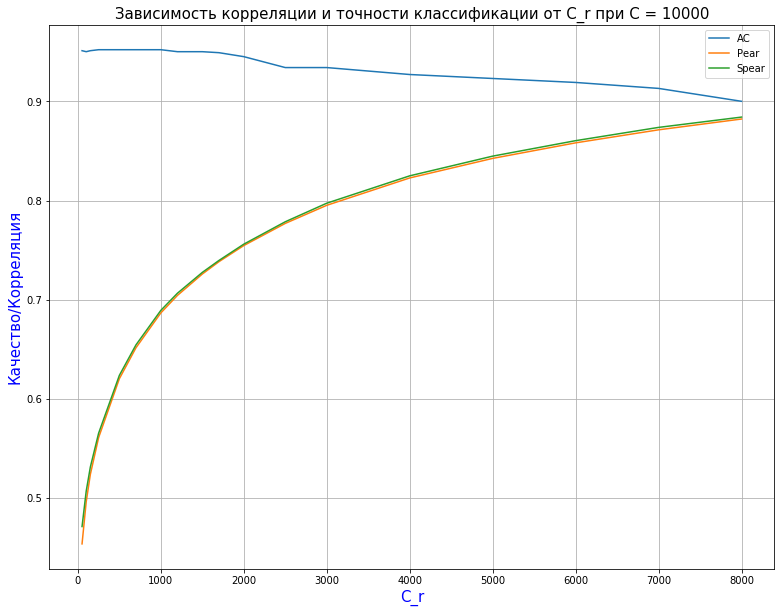

In [116]:
plt.figure(figsize=(13, 10))
plt.plot(C_r,ACCR)
plt.plot(C_r,PEAR)
plt.plot(C_r,SPEAR)
plt.xlabel('C_r', fontsize=15, color='blue')
plt.ylabel('Качество/Корреляция', fontsize=15, color='blue')
plt.title('Зависимость корреляции и точности классификации от C_r при C = 10000', fontsize=15)
plt.legend(['AC', 'Pear', 'Spear'])
plt.grid(which='both',axis='both',fillstyle='full')

In [118]:
arf = np.load("output_grids/Grid_6/Grid_6_C_316.0_Cr_32.0.npy")

In [129]:
print('count(w[i]>0):',len(np.where(arf>0)[0]))
print('count(w[i]==0):',len(np.where(arf==0)[0]))
print('count(w[i]<0):',len(np.where(arf<0)[0]))
print('flexibility *',arf[-1])

count(w[i]>0): 2748
count(w[i]==0): 89
count(w[i]<0): 3604
flexibility * -0.0002325723068720767


---

### Сетка 6: Сетка с всеми признаками от классификации и с flexibility
Признаки никак не обрабатывались. Ошибка в вычислениях d исправлена

$C_r$ in $10\left(\sqrt{10}\right)^{[1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 5.6, 5.8]}$

$C$ in $100\left(\sqrt{10}\right)^{[1,2,3,4,5,6]}$

In [135]:
ind = [i for i in range(6440)]
ind.append(6818)

X_1000_float64_1 = X_1000_float64[:,ind]

X_1000_float64_1.shape

(19000, 6441)

In [136]:
P = 1000
D = 19

set_i_and_j = range(1, P*D+1)
set_k = range(1, D+1)
set_l = range(0,P*D,D)

In [372]:
C_r = np.round(10*np.sqrt(10)**np.array([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,5.6,5.8]),0)
C = np.round(100*np.sqrt(10)**np.array([1,2,3,4,5,6]),0)

In [139]:
ACCR = []
SPEAR = []
PEAR = []
array_with_data = []
for c_r in C_r:
    for c in C:
        
        if c_r >= c:
            continue
        
        w = np.load("output_grids/Grid_6_1/Grid_6_1_C_"+str(c)+"_Cr_"+str(c_r)+".npy")
        
        #-----------------------------------------------------------------------------
        
        Spearman = corr_energy(y_1000_float64, X_1000_float64_1, w, s_1000_float64, method = "Spearman")
        Pearson = corr_energy(y_1000_float64, X_1000_float64_1, w, s_1000_float64, method = "Pearson")
        accr = prop_native_conformations(y_1000_float64, X_1000_float64_1, w)
        
        array_with_data.append([c,c_r,accr,Spearman,Pearson])
        ACCR.append(accr)
        SPEAR.append(Spearman[0])
        PEAR.append(Pearson[0])
        
        #print("C = {0}, C_r = {1}: flexibility*{2}; max = {3}; mean = {4}; norm = {5} \n".format(c,c_r,round(w[-1],3),round(np.max(np.abs(w)),3),round(np.mean(w),3),round(np.linalg.norm(w),3) ))
        print("C = {0}, C_r = {1} : **AC** = *{2}*, **Sp** = *{3}*, **Pear** = *{4}*\n".format(c,c_r,round(accr,3),round(Spearman[0],3),round(Pearson[0],3)))

C = 316.0, C_r = 32.0 : **AC** = *0.825*, **Sp** = *0.592*, **Pear** = *0.58*

C = 1000.0, C_r = 32.0 : **AC** = *0.89*, **Sp** = *0.569*, **Pear** = *0.551*

C = 3162.0, C_r = 32.0 : **AC** = *0.924*, **Sp** = *0.517*, **Pear** = *0.494*

C = 10000.0, C_r = 32.0 : **AC** = *0.949*, **Sp** = *0.454*, **Pear** = *0.43*

C = 31623.0, C_r = 32.0 : **AC** = *0.98*, **Sp** = *0.363*, **Pear** = *0.343*

C = 100000.0, C_r = 32.0 : **AC** = *0.993*, **Sp** = *0.283*, **Pear** = *0.267*

C = 316.0, C_r = 56.0 : **AC** = *0.8*, **Sp** = *0.618*, **Pear** = *0.612*

C = 1000.0, C_r = 56.0 : **AC** = *0.894*, **Sp** = *0.591*, **Pear** = *0.58*

C = 3162.0, C_r = 56.0 : **AC** = *0.926*, **Sp** = *0.541*, **Pear** = *0.522*

C = 10000.0, C_r = 56.0 : **AC** = *0.951*, **Sp** = *0.477*, **Pear** = *0.461*

C = 31623.0, C_r = 56.0 : **AC** = *0.98*, **Sp** = *0.382*, **Pear** = *0.368*

C = 100000.0, C_r = 56.0 : **AC** = *0.993*, **Sp** = *0.3*, **Pear** = *0.292*

C = 316.0, C_r = 100.0 : **AC** 

In [182]:
path = '/disk2/chmnk/pl-opt/data/pdbbind/2016/protlig_stat/for_optimization/general_t14_t3_l7.0_g1.0_r1.0sasa_solvent_all_float64_seed104504/'
ind = [i for i in range(6440)]
ind.append(6818)
array_with_data = []

for c_r in C_r:
    for c in C:
        if c_r >= c:
            continue
        w = np.load("output_grids/Grid_6_1/Grid_6_1_C_"+str(c)+"_Cr_"+str(c_r)+".npy")
        #print(len(w))
        
        for folder in os.listdir(path):
            for file in os.listdir(path+folder):
                if file.startswith("data"):
                    loader = np.load(path+folder+'/'+file)
                    X_test = csr_matrix((loader['data'], loader['indices'], loader['indptr']), shape=loader['shape'])[:,ind]
                elif file.startswith("labels"):
                    y_test = np.load(path+folder+'/'+file)
                    #print(y_test[:20], len(y_test))
                elif file.startswith("affinities"):
                    s_test = np.load(path+folder+'/'+file)
                    #print(s_test[:20],len(s_test))
            #print('-----------------------------------\n')
                    
            Spearman = corr_energy(y_test, X_test, w, s_test, method = "Spearman")
            Pearson = corr_energy(y_test, X_test, w, s_test, method = "Pearson")
            accr = prop_native_conformations(y_test, X_test, w)
            array_with_data.append([c,c_r,accr,Spearman,Pearson])

In [194]:
for i in range(0,len(array_with_data), len(os.listdir(path))):
    

[[316.0,
  32.0,
  0.718,
  SpearmanrResult(correlation=0.5476204113239467, pvalue=2.5196256135355768e-79),
  (0.5087647932558652, 6.027210127284642e-67)],
 [316.0,
  32.0,
  0.733,
  SpearmanrResult(correlation=0.5117031036160176, pvalue=7.927129503683763e-68),
  (0.4994757053309665, 3.231380862465262e-64)],
 [316.0,
  32.0,
  0.74,
  SpearmanrResult(correlation=0.504432936964443, pvalue=1.1570643297483083e-65),
  (0.49265028144072043, 2.8964267256963857e-62)],
 [316.0,
  32.0,
  0.729,
  SpearmanrResult(correlation=0.49235665788860783, pvalue=3.506461716715871e-62),
  (0.47374905940267487, 4.4037859298105396e-57)],
 [316.0,
  32.0,
  0.731,
  SpearmanrResult(correlation=0.5382812877109387, pvalue=3.3527547263816796e-76),
  (0.5160529041988269, 3.793093008377487e-69)],
 [316.0,
  32.0,
  0.721,
  SpearmanrResult(correlation=0.5526178981251854, pvalue=4.883289875495506e-81),
  (0.5547406497249411, 8.962608162401952e-82)],
 [316.0,
  32.0,
  0.724,
  SpearmanrResult(correlation=0.532865

In [234]:
sp_C = []
sp_C_r = []
sp_accr = []
sp_spear = []
sp_pear = []
for i in range(0,len(array_with_data),len(os.listdir(path))):
    a_accr = []
    a_spear = []
    a_pear = []

    for elem in array_with_data[i:i+len(os.listdir(path))]:
        a_accr.append(elem[2])
        a_spear.append(elem[3][0])
        a_pear.append(elem[4][0])
        
    sp_C.append(elem[0])
    sp_C_r.append(elem[1])
    sp_accr.append(round(np.mean(a_accr),3))
    sp_spear.append(round(np.mean(a_spear),3))
    sp_pear.append(round(np.mean(a_pear),3))

    print('C =',int(elem[0]),' C_r =',int(elem[1]),'  Accr =',round(np.mean(a_accr),3),'  Spear =',round(np.mean(a_spear),3),'  Pear =',round(np.mean(a_pear),3))

C = 316  C_r = 32   Accr = 0.73   Spear = 0.526   Pear = 0.505
C = 1000  C_r = 32   Accr = 0.808   Spear = 0.503   Pear = 0.473
C = 3162  C_r = 32   Accr = 0.835   Spear = 0.46   Pear = 0.421
C = 10000  C_r = 32   Accr = 0.85   Spear = 0.415   Pear = 0.378
C = 31623  C_r = 32   Accr = 0.847   Spear = 0.362   Pear = 0.321
C = 100000  C_r = 32   Accr = 0.833   Spear = 0.302   Pear = 0.269
C = 316  C_r = 56   Accr = 0.712   Spear = 0.528   Pear = 0.509
C = 1000  C_r = 56   Accr = 0.81   Spear = 0.507   Pear = 0.481
C = 3162  C_r = 56   Accr = 0.838   Spear = 0.467   Pear = 0.431
C = 10000  C_r = 56   Accr = 0.851   Spear = 0.423   Pear = 0.389
C = 31623  C_r = 56   Accr = 0.847   Spear = 0.366   Pear = 0.33
C = 100000  C_r = 56   Accr = 0.834   Spear = 0.307   Pear = 0.28
C = 316  C_r = 100   Accr = 0.676   Spear = 0.528   Pear = 0.512
C = 1000  C_r = 100   Accr = 0.806   Spear = 0.512   Pear = 0.489
C = 3162  C_r = 100   Accr = 0.841   Spear = 0.475   Pear = 0.443
C = 10000  C_r = 100   

In [373]:
path = '/disk2/chmnk/pl-opt/data/pdbbind/2016/protlig_stat/for_optimization/general_t14_t3_l7.0_g1.0_r1.0sasa_solvent_all_float64_seed104504/'
ind = [i for i in range(6440)]
ind.append(6818)
array_with_data = []
cc_rr = []
cc = []
spear = []
pear = []
accr_ = []


for c_r in C_r: 
    for c in C:
        if c_r >= c:
            cc_rr.append(c_r)
            cc.append(c)
            spear.append(0)
            pear.append(0)
            accr_.append(0)
            continue
        w = np.load("output_grids/Grid_6_1/Grid_6_1_C_"+str(c)+"_Cr_"+str(c_r)+".npy")
        #print(len(w))
        
        SPEAR = []
        PEAR=[]
        ACCR = []
        
        for folder in os.listdir(path):
            for file in os.listdir(path+folder):
                if file.startswith("data"):
                    loader = np.load(path+folder+'/'+file)
                    X_test = csr_matrix((loader['data'], loader['indices'], loader['indptr']), shape=loader['shape'])[:,ind]
                elif file.startswith("labels"):
                    y_test = np.load(path+folder+'/'+file)
                    #print(y_test[:20], len(y_test))
                elif file.startswith("affinities"):
                    s_test = np.load(path+folder+'/'+file)
                    #print(s_test[:20],len(s_test))
            #print('-----------------------------------\n')
                    
            SPEAR.append(corr_energy(y_test, X_test, w, s_test, method = "Spearman")[0])
            PEAR.append(corr_energy(y_test, X_test, w, s_test, method = "Pearson")[0])
            ACCR.append(prop_native_conformations(y_test, X_test, w))
            
            
        cc_rr.append(c_r)
        cc.append(c)
        spear.append(np.mean(SPEAR))
        pear.append(np.mean(PEAR))
        accr_.append(np.mean(ACCR))

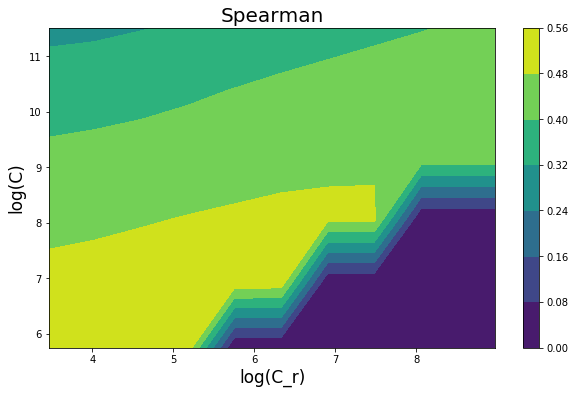

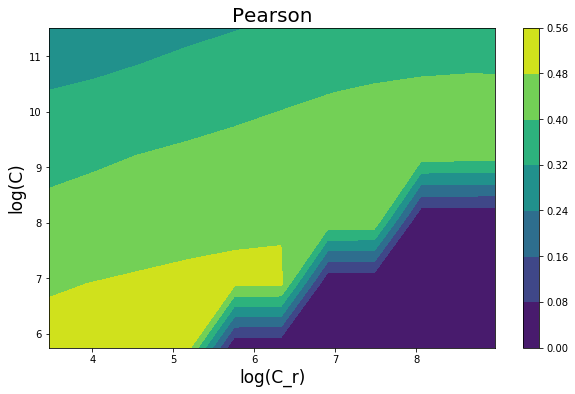

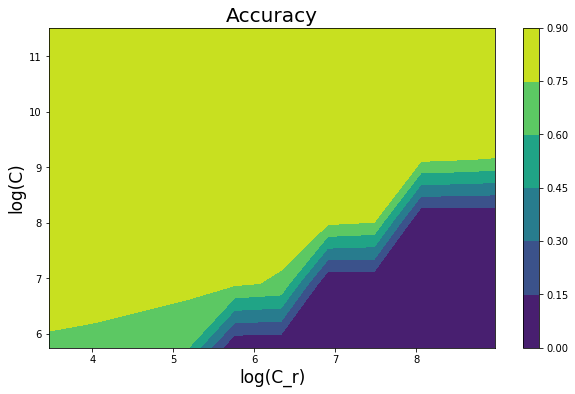

In [377]:
plt.figure(figsize=(10, 20))

plt.subplot(3, 1, 1)
cp = plt.contourf(np.log(np.reshape(cc_rr, (-1, 6))), np.log(np.reshape(cc, (-1, 6))), np.reshape(spear, (-1, 6)))
plt.colorbar(cp)
plt.title('Spearman', fontsize=20)
plt.xlabel('log(C_r)', fontsize=17)
plt.ylabel('log(C)', fontsize=17)
plt.show()

plt.figure(figsize=(10, 20))
plt.subplot(3, 1, 2)
cp = plt.contourf(np.log(np.reshape(cc_rr, (-1, 6))), np.log(np.reshape(cc, (-1, 6))), np.reshape(pear, (-1, 6)))
plt.colorbar(cp)
plt.title('Pearson', fontsize=20)
plt.xlabel('log(C_r)', fontsize=17)
plt.ylabel('log(C)', fontsize=17)
plt.show()

plt.figure(figsize=(10, 20))
plt.subplot(3, 1, 3)
cp = plt.contourf(np.log(np.reshape(cc_rr, (-1, 6))), np.log(np.reshape(cc, (-1, 6))), np.reshape(accr_, (-1, 6)))
plt.colorbar(cp)
plt.title('Accuracy', fontsize=20)
plt.xlabel('log(C_r)', fontsize=17)
plt.ylabel('log(C)', fontsize=17)
plt.show()

---

### Сетка 7: Сетка с всеми признаками от классификации и от регрессии
Признаки никак не обрабатывались. Ошибка в вычислениях d исправлена

$C_r$ in $\left(\sqrt{10}\right)^{[1,2,3,4,4.5,5,6,7]}$

$C$ in $\left(\sqrt{10}\right)^{[1,2,3,4,4.5,5,6,7]}$

In [328]:
path = '/disk2/chmnk/pl-opt/data/pdbbind/2016/protlig_stat/for_optimization/general_t14_t3_l7.0_g1.0_r1.0sasa_solvent_all_float64_seed104504/general_t14_t3_l7.0_g1.0_r1.0sasa_solvent_all_float64_seed104504_from0_to1000'


y_1000_float64 = np.load(path+"/labels_general_t14_t3_l7.0_g1.0_r1.0sasa_solvent_all_float64_seed104504_from0_to1000.npy").astype(dtype=np.float)
s_1000_float64 = np.load(path+"/affinities_general_t14_t3_l7.0_g1.0_r1.0sasa_solvent_all_float64_seed104504_from0_to1000.npy")

loader = np.load(path+"/data_array_general_t14_t3_l7.0_g1.0_r1.0sasa_solvent_all_float64_seed104504_from0_to1000_sparse.npz")
X_1000_float64_1 = csr_matrix((loader['data'], loader['indices'], loader['indptr']),
               shape=loader['shape']) 
del loader

X_1000_float64_1.shape

(19000, 6819)

In [380]:
C_r = np.round(np.sqrt(10)**np.array([1,2,3,4,4.5,5,6,7]),3)
C = np.round(np.sqrt(10)**np.array([1,2,3,4,4.5,5,6,7]),3)

In [369]:
print(len(cc))
print(C_r)
print(C)

64
[3.162000e+00 1.000000e+01 3.162300e+01 1.000000e+02 1.778280e+02
 3.162280e+02 1.000000e+03 3.162278e+03]
[3.162000e+00 1.000000e+01 3.162300e+01 1.000000e+02 1.778280e+02
 3.162280e+02 1.000000e+03 3.162278e+03]


In [136]:
P = 1000
D = 19

set_i_and_j = range(1, P*D+1)
set_k = range(1, D+1)
set_l = range(0,P*D,D)

In [332]:
ACCR = []
SPEAR = []
PEAR = []
array_with_data = []
for c_r in C_r:
    for c in C:
        
        if c_r >= c:
            continue
        
        w = np.load("output_grids/Grid_7/Grid_7_C_"+str(c)+"_Cr_"+str(c_r)+".npy")
        
        #-----------------------------------------------------------------------------
        
        Spearman = corr_energy(y_1000_float64, X_1000_float64_1, w, s_1000_float64, method = "Spearman")
        Pearson = corr_energy(y_1000_float64, X_1000_float64_1, w, s_1000_float64, method = "Pearson")
        accr = prop_native_conformations(y_1000_float64, X_1000_float64_1, w)
        
        array_with_data.append([c,c_r,accr,Spearman,Pearson])
        ACCR.append(accr)
        SPEAR.append(Spearman[0])
        PEAR.append(Pearson[0])
        
        #print("C = {0}, C_r = {1}: flexibility*{2}; max = {3}; mean = {4}; norm = {5} \n".format(c,c_r,round(w[-1],3),round(np.max(np.abs(w)),3),round(np.mean(w),3),round(np.linalg.norm(w),3) ))
        print("C = {0}, C_r = {1} : **AC** = *{2}*, **Sp** = *{3}*, **Pear** = *{4}*\n".format(c,c_r,round(accr,3),round(Spearman[0],3),round(Pearson[0],3)))

C = 10.0, C_r = 3.162 : **AC** = *0.24*, **Sp** = *0.617*, **Pear** = *0.602*

C = 31.623, C_r = 3.162 : **AC** = *0.633*, **Sp** = *0.597*, **Pear** = *0.575*

C = 100.0, C_r = 3.162 : **AC** = *0.8*, **Sp** = *0.588*, **Pear** = *0.563*

C = 177.828, C_r = 3.162 : **AC** = *0.827*, **Sp** = *0.583*, **Pear** = *0.558*

C = 316.228, C_r = 3.162 : **AC** = *0.837*, **Sp** = *0.567*, **Pear** = *0.546*

C = 1000.0, C_r = 3.162 : **AC** = *0.884*, **Sp** = *0.505*, **Pear** = *0.489*

C = 3162.278, C_r = 3.162 : **AC** = *0.921*, **Sp** = *0.405*, **Pear** = *0.391*

C = 31.623, C_r = 10.0 : **AC** = *0.426*, **Sp** = *0.646*, **Pear** = *0.637*

C = 100.0, C_r = 10.0 : **AC** = *0.744*, **Sp** = *0.628*, **Pear** = *0.614*

C = 177.828, C_r = 10.0 : **AC** = *0.806*, **Sp** = *0.623*, **Pear** = *0.607*

C = 316.228, C_r = 10.0 : **AC** = *0.833*, **Sp** = *0.611*, **Pear** = *0.595*

C = 1000.0, C_r = 10.0 : **AC** = *0.885*, **Sp** = *0.555*, **Pear** = *0.542*

C = 3162.278, C_r = 10

In [379]:
dir_ = list(os.listdir(path))
dir_.remove('general_t14_t3_l7.0_g1.0_r1.0sasa_solvent_all_float64_seed104504_from0_to1000')
dir_

['general_t14_t3_l7.0_g1.0_r1.0sasa_solvent_all_float64_seed104504_from1000_to2000',
 'general_t14_t3_l7.0_g1.0_r1.0sasa_solvent_all_float64_seed104504_from9000_to10000',
 'general_t14_t3_l7.0_g1.0_r1.0sasa_solvent_all_float64_seed104504_from5000_to6000',
 'general_t14_t3_l7.0_g1.0_r1.0sasa_solvent_all_float64_seed104504_from7000_to8000',
 'general_t14_t3_l7.0_g1.0_r1.0sasa_solvent_all_float64_seed104504_from2000_to3000',
 'general_t14_t3_l7.0_g1.0_r1.0sasa_solvent_all_float64_seed104504_from10000_to11000',
 'general_t14_t3_l7.0_g1.0_r1.0sasa_solvent_all_float64_seed104504_from8000_to9000',
 'general_t14_t3_l7.0_g1.0_r1.0sasa_solvent_all_float64_seed104504_from6000_to7000',
 'general_t14_t3_l7.0_g1.0_r1.0sasa_solvent_all_float64_seed104504_from3000_to4000',
 'general_t14_t3_l7.0_g1.0_r1.0sasa_solvent_all_float64_seed104504_from12000_to12615',
 'general_t14_t3_l7.0_g1.0_r1.0sasa_solvent_all_float64_seed104504_from11000_to12000',
 'general_t14_t3_l7.0_g1.0_r1.0sasa_solvent_all_float64_se

In [357]:
path = '/disk2/chmnk/pl-opt/data/pdbbind/2016/protlig_stat/for_optimization/general_t14_t3_l7.0_g1.0_r1.0sasa_solvent_all_float64_seed104504/'
array_with_data = []
dir_ = list(os.listdir(path))
dir_.remove('general_t14_t3_l7.0_g1.0_r1.0sasa_solvent_all_float64_seed104504_from0_to1000')


for c_r in C_r:
    for c in C:
        if c_r >= c:
            continue
        w = np.load("output_grids/Grid_7/Grid_7_C_"+str(c)+"_Cr_"+str(c_r)+".npy")
        #print(len(w))
        
        for folder in dir_:
            for file in os.listdir(path+folder):
                if file.startswith("data"):
                    loader = np.load(path+folder+'/'+file)
                    X_test = csr_matrix((loader['data'], loader['indices'], loader['indptr']), shape=loader['shape'])
                elif file.startswith("labels"):
                    y_test = np.load(path+folder+'/'+file)
                    #print(y_test[:20], len(y_test))
                elif file.startswith("affinities"):
                    s_test = np.load(path+folder+'/'+file)
                    #print(s_test[:20],len(s_test))
            #print('-----------------------------------\n')
                    
            Spearman = corr_energy(y_test, X_test, w, s_test, method = "Spearman")
            Pearson = corr_energy(y_test, X_test, w, s_test, method = "Pearson")
            accr = prop_native_conformations(y_test, X_test, w)
            array_with_data.append([c,c_r,accr,Spearman,Pearson])

In [358]:
sp_C = []
sp_C_r = []
sp_accr = []
sp_spear = []
sp_pear = []

dir_ = list(os.listdir(path))
dir_.remove('general_t14_t3_l7.0_g1.0_r1.0sasa_solvent_all_float64_seed104504_from0_to1000')

for i in range(0,len(array_with_data),len(dir_)):
    a_accr = []
    a_spear = []
    a_pear = []

    for elem in array_with_data[i:i+len(dir_)]:
        a_accr.append(elem[2])
        a_spear.append(elem[3][0])
        a_pear.append(elem[4][0])
        
    sp_C.append(elem[0])
    sp_C_r.append(elem[1])
    sp_accr.append(round(np.mean(a_accr),3))
    sp_spear.append(round(np.mean(a_spear),3))
    sp_pear.append(round(np.mean(a_pear),3))

    print('C =',elem[0],' C_r =',elem[1],'  Accr =',round(np.mean(a_accr),3),'  Spear =',round(np.mean(a_spear),3),'  Pear =',round(np.mean(a_pear),3))

C = 10.0  C_r = 3.162   Accr = 0.191   Spear = 0.515   Pear = 0.484
C = 31.623  C_r = 3.162   Accr = 0.545   Spear = 0.51   Pear = 0.478
C = 100.0  C_r = 3.162   Accr = 0.729   Spear = 0.501   Pear = 0.471
C = 177.828  C_r = 3.162   Accr = 0.754   Spear = 0.496   Pear = 0.468
C = 316.228  C_r = 3.162   Accr = 0.763   Spear = 0.482   Pear = 0.456
C = 1000.0  C_r = 3.162   Accr = 0.785   Spear = 0.421   Pear = 0.395
C = 3162.278  C_r = 3.162   Accr = 0.801   Spear = 0.329   Pear = 0.303
C = 31.623  C_r = 10.0   Accr = 0.342   Spear = 0.522   Pear = 0.492
C = 100.0  C_r = 10.0   Accr = 0.657   Spear = 0.518   Pear = 0.489
C = 177.828  C_r = 10.0   Accr = 0.732   Spear = 0.514   Pear = 0.485
C = 316.228  C_r = 10.0   Accr = 0.761   Spear = 0.503   Pear = 0.476
C = 1000.0  C_r = 10.0   Accr = 0.792   Spear = 0.45   Pear = 0.424
C = 3162.278  C_r = 10.0   Accr = 0.806   Spear = 0.363   Pear = 0.337
C = 100.0  C_r = 31.623   Accr = 0.523   Spear = 0.526   Pear = 0.499
C = 177.828  C_r = 31.62

In [381]:
path = '/disk2/chmnk/pl-opt/data/pdbbind/2016/protlig_stat/for_optimization/general_t14_t3_l7.0_g1.0_r1.0sasa_solvent_all_float64_seed104504/'
dir_ = list(os.listdir(path))
dir_.remove('general_t14_t3_l7.0_g1.0_r1.0sasa_solvent_all_float64_seed104504_from0_to1000')

array_with_data = []
cc_rr = []
cc = []
spear = []
pear = []
accr_ = []


for c_r in C_r: 
    for c in C:
        if c_r >= c:
            cc_rr.append(c_r)
            cc.append(c)
            spear.append(0)
            pear.append(0)
            accr_.append(0)
            continue
        w = np.load("output_grids/Grid_7/Grid_7_C_"+str(c)+"_Cr_"+str(c_r)+".npy")
        #print(len(w))
        
        SPEAR = []
        PEAR=[]
        ACCR = []
        
        for folder in dir_:
            for file in os.listdir(path+folder):
                if file.startswith("data"):
                    loader = np.load(path+folder+'/'+file)
                    X_test = csr_matrix((loader['data'], loader['indices'], loader['indptr']), shape=loader['shape'])
                elif file.startswith("labels"):
                    y_test = np.load(path+folder+'/'+file)
                    #print(y_test[:20], len(y_test))
                elif file.startswith("affinities"):
                    s_test = np.load(path+folder+'/'+file)
                    #print(s_test[:20],len(s_test))
            #print('-----------------------------------\n')
                    
            SPEAR.append(corr_energy(y_test, X_test, w, s_test, method = "Spearman")[0])
            PEAR.append(corr_energy(y_test, X_test, w, s_test, method = "Pearson")[0])
            ACCR.append(prop_native_conformations(y_test, X_test, w))
            
            
        cc_rr.append(c_r)
        cc.append(c)
        spear.append(np.mean(SPEAR))
        pear.append(np.mean(PEAR))
        accr_.append(np.mean(ACCR))

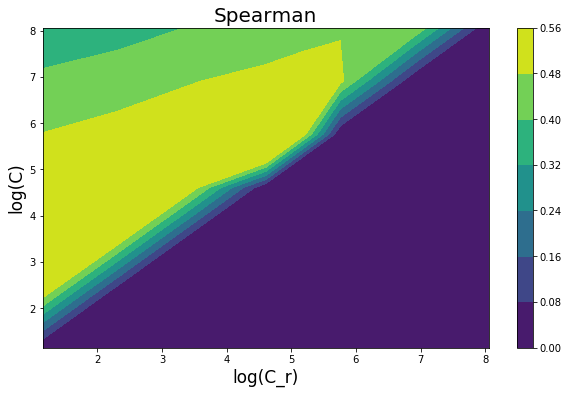

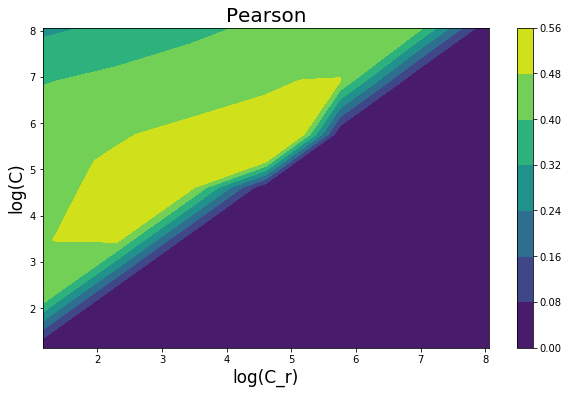

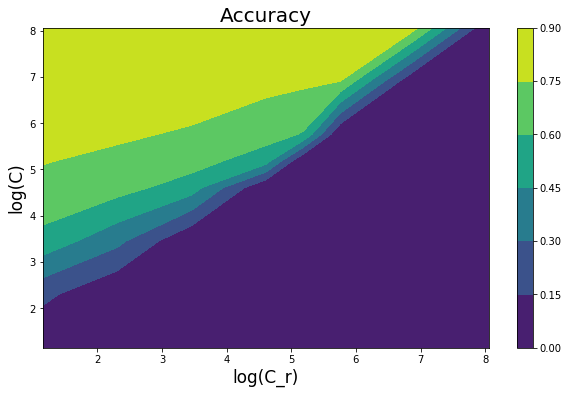

In [382]:
plt.figure(figsize=(10, 20))

plt.subplot(3, 1, 1)
cp = plt.contourf(np.log(np.reshape(cc_rr, (-1, 8))), np.log(np.reshape(cc, (-1, 8))), np.reshape(spear, (-1, 8)))
plt.colorbar(cp)
plt.title('Spearman', fontsize=20)
plt.xlabel('log(C_r)', fontsize=17)
plt.ylabel('log(C)', fontsize=17)
plt.show()

plt.figure(figsize=(10, 20))
plt.subplot(3, 1, 2)
cp = plt.contourf(np.log(np.reshape(cc_rr, (-1, 8))), np.log(np.reshape(cc, (-1, 8))), np.reshape(pear, (-1, 8)))
plt.colorbar(cp)
plt.title('Pearson', fontsize=20)
plt.xlabel('log(C_r)', fontsize=17)
plt.ylabel('log(C)', fontsize=17)
plt.show()

plt.figure(figsize=(10, 20))
plt.subplot(3, 1, 3)
cp = plt.contourf(np.log(np.reshape(cc_rr, (-1, 8))), np.log(np.reshape(cc, (-1, 8))), np.reshape(accr_, (-1, 8)))
plt.colorbar(cp)
plt.title('Accuracy', fontsize=20)
plt.xlabel('log(C_r)', fontsize=17)
plt.ylabel('log(C)', fontsize=17)
plt.show()

---